<a href="https://colab.research.google.com/github/LuisMig-code/Analise-e-previsao-de-ataques-cardiacos/blob/main/An%C3%A1lise_e_previs%C3%A3o_de_ataques_card%C3%ADacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e previsão de Ataques Cardíacos**

Ataques cardíacos são , ainda , a causa de um grande número de mortes ao redor do mundo , de acordo com a **OMS** (Organização Mundial da Saúde) , anualmente cerca de **17,5 milhões de pessoas** [morrem](https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/oms-175-milhoes-de-pessoas-morrem-todos-os-anos-de-doencas-cardiovasculares) por ele e outras doenças cardiovasculares. O mais triste de tudo isso é que ao contrário de muitas outras doenças , as relacionadas ao coração não vem de vírus e bacterias , mas sim da **falta de cuidado da saúde por parte da população**. Uma dieta saudável e equilibrada , aliado a prática de exercícios físicos regulares são o suficiente para evitar qualquer problema do tipo e ter uma vida mais longínqua.

<img src="https://images.pexels.com/photos/6532989/pexels-photo-6532989.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=900>

No artigo de hoje vamos entender mais sobre essa doença e como a Ciência de Dados pode ajudar na detecção de problemas cardíacos.

## Importando os dados

Ao longo deste Notebook do GoogleColaboratory iremos realizar diversas análises e predições de modelos , para isso vamos começar importando as bibliotecas que usaremos para nossas análises:

In [1]:
# importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Como iremos realizar análises gráficas , é interessante definir as paletas de cores que serão usadas:

In [2]:
# definindo as paletas de cores
paleta_qualitativa = "Set2"

paleta_sequencial = "Blues"

paleta_divergente = "RdBu"

# setando para os plots não serem do matplotlib
sns.set(color_codes=True)

**A fim de tornar nosso ambiente mais *soft* e limpo de muitos códigos , decidi por reservar este espaço para a criação das funções que serão usadas no decorrer do artigo**

In [3]:
def box_plot(data , label_x , titulo , desc_label_x):
  ax = sns.boxplot(data = data , x=label_x , palette=paleta_qualitativa ,  orient="h")
  plt.xlim(data[label_x].min()-1, data[label_x].max()+1)

  ax.set_title(titulo,fontsize=22 , loc="left")
  ax.set_xlabel(desc_label_x,fontsize=14)

  return ax

In [4]:
def retorna_outliers(data , coluna):
  Q1=data[coluna].quantile(0.25)
  Q3=data[coluna].quantile(0.75)

  IQR=Q3-Q1
  
  outlier_menor=(Q1 - 1.5 * IQR).round(2)
  outlier_maior=(Q3 + 1.5 * IQR).round(2)

  return outlier_menor,outlier_maior

In [5]:
def hist_plot(data , bins , variavel , titulo , label_x ,hue=None ,legends=None):
  plt.figure(figsize=(12,8))

  # caso tenha hue plote da seguinte forma
  if hue != None:
    ax = sns.histplot(data = data ,bins=bins, x=variavel , hue=hue , kde=True , multiple="dodge", shrink=.8 , palette=paleta_qualitativa)
    ax.legend(legends , loc="upper left",fontsize=16)

  # caso não tenha hue , plote da seguinte forma
  else:
    ax = sns.histplot(data = data ,bins=bins, x=variavel , kde=True , multiple="dodge", shrink=.8 , palette=paleta_qualitativa)

  #definindos os títulos e labels
  ax.set_title("{} \n".format(titulo),fontsize=24)
  ax.set_xlabel(label_x , fontsize=14)
  ax.set_ylabel("Quantidade" , fontsize=14)
  
  return ax

In [6]:
def coef_person(v):
  print(v)
  if v > 1:
    print('Assimetria Positiva')
  elif v < -1:
    print("Assimetrica Negativa")
  elif v>-1 and v<1:
    print("Distribuição Simétrica ou Relativamente simétrica")

In [7]:
def count_plot_hue(data , variavel_x , hue , xlabel , title , legend , paleta = paleta_qualitativa):
  plt.figure(figsize=(12,8))
  ax = sns.countplot(data=data , x=variavel_x,hue=hue , palette=paleta)

  # Adicionando o texto nos labels X e Y
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel("Quantidade",fontsize=14)
  ax.set_title(title , fontsize= 18)

  # adicionando legendas aos dados
  ax.legend(legend , fontsize=14)

In [8]:
def count_plot(data , variavel_da_contagem , label_x , titulo):
  # plotando o gráfico
  ax = sns.countplot(x = variavel_da_contagem , palette=paleta_qualitativa , data=data)

  # adicionando o texto com os valores individuais em cada coluna
  dados = data[variavel_da_contagem].value_counts() 
  for valor in range(0,dados.shape[0]) :
    ax.text(valor-0.09,dados[valor],"{}".format(dados[valor]),fontsize=14)
    
  # Adicionando o texto nos labels X e Y
  ax.set_xlabel(label_x, fontsize=14)
  ax.set_ylabel("Quantidade",fontsize=14)

  ax.set_title(titulo,fontsize=20)


  # determinando um limite para o eixo Y
  #plt.ylim(0,220)

  return ax

### Base de Dados

Nossa base de dados foi obtida no site [Kaggle](https://www.kaggle.com/) e você pode acessá-la clicando [aqui](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

Kaggle é uma plataforma para cientista de dados no qual há o compartilhamento de inúmeras bases de dados e a que usaremos hoje veio diretamente de lá!

Vamos começar lendo nossos dados e ver os 5 primeiros itens presentes nele

In [9]:
link_data = "https://www.dropbox.com/s/irdsbfko8e2g7lq/heart.csv?dl=1"
df = pd.read_csv(link_data)

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


O primeiro fator que devemos destacar é que não sabemos o que cada uma das variáveis quer dizer, temos várias colunas que isoladamente (e fora de contexto) não significam nada , vou começar trazendo o significado delas por meio de um sumário:

- **Age** : Idade do paciente

- **Sex** : Sexo do paciente

- **exang**: Dor no peito ao fazer exercícios (1 = sim; 0 = não)

- **ca**: Número de vasos principais (0-3)

- **cp** : Tipo de dor no peito

    - Valor 0: Típica
    - Valor 1: Atípica
    - Valor 2: Sem dor
    - Valor 3: Assintomático

- **trtbps** : Pressão arterial em repouso (em mm/Hg)

- **chol** : Colesterol em mg/dl obtido através do sensor de IMC

- **fbs** : Açúcar no sangue em jejum> 120 mg/dl ? (1 = sim; 0 = não)

- **rest_ecg** : Resultados eletrocardiográficos em repouso

    - Valor 0: normal
    - Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão ST> 0,05 mV)
    - Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

- **thalach** : Frequência cardíaca máxima alcançada

- **target** : `variável alvo` 0 = Menos chance de ataque cardíaco | 1= Maiores chances de ataque cardíaco . Basicamente é esta variável que **queremos prever** com *Machine Learning*.

Tendo em mãos o significado de cada coluna (variável) podemos começar algumas análises.

Primeiro de tudo , por questão de gosto , vou renomear as colunas de forma que fique mais fácil para eu podê-las interpretar

In [11]:
df.columns = ["idade" , "sexo","tipo_dor_no_peito","pressa_sanguinea","colesterol_mg_dl","acucar_no_sangue","results_eletrocard"
              ,"freq_cardi_max","exercicio","pico_anterior","inclinacao","vazos_principais","taxa_thall","alvo"]

Feito isso , observe que temos uma variável "sexo" ("sex") , o que eu gostaria de fazer é saber o que os valores representam , **afinal , 0 é para Masculino ou Feminino? **Após consultar a fonte da base de dados descobri e a fim de não esquecer, vou criar outra coluna que possa me informar o resultado em **forma de texto** da variável sexo

In [12]:
df["sexo_str"] = df.sexo
df.sexo_str = df.sexo_str.map({0:"Feminino" , 1:"Masculino"})

Ao fim , temos o seguinte *dataset* (conjunto de dados):

In [13]:
df.head()

,idade,sexo,tipo_dor_no_peito,pressa_sanguinea,colesterol_mg_dl,acucar_no_sangue,results_eletrocard,freq_cardi_max,exercicio,pico_anterior,inclinacao,vazos_principais,taxa_thall,alvo,sexo_str
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Masculino
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Masculino
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Feminino
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Masculino
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Feminino


## Pré -Análises

Vamos começar vendo de forma mais geral algumas características estatisticas dos nossos dados:

In [14]:
df.describe()

,idade,sexo,tipo_dor_no_peito,pressa_sanguinea,colesterol_mg_dl,acucar_no_sangue,results_eletrocard,freq_cardi_max,exercicio,pico_anterior,inclinacao,vazos_principais,taxa_thall,alvo
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Já podemos constatar alguns dados interessantes, a idade máxima que temos em nosso conjunto de dados é 77 anos , temos uma (ou mais) pessoa(s) com um colesterol de 564 mg/dl. Isso será anlisado posteriormente , mas já temos informações valiosas dos nossos dados.

Algo que ainda não sabemos , mas que é deveras importante para qualquer análise, é a quantidade de dados totais que temos em nossos dados, vamos lá?

In [15]:
print("A quantidade de linhas em nosso dataset é de {} e temos um total de {} colunas".format(df.shape[0] , df.shape[1]))

A quantidade de linhas em nosso dataset é de 303 e temos um total de 15 colunas


Portanto , sabemos que temos um total de 303 entradas em nossos dados e um total de 15 colunas , incluindo a variável alvo.

Algo importante de sabermos também é se há entradas (valores) nulos em nosso dataset , afinal , caso hajam , podemos ter problemas nos resultados de nossas análises gráficas ou na produção de um modelo de *Machine Learning*.

In [16]:
valores_nulos = df.isnull().sum().sum()
print("A quantidade de valores nulos em nosso dataset é de: {} valores".format(valores_nulos))

A quantidade de valores nulos em nosso dataset é de: 0 valores


Agora que sabemos que não existem valores nulos em nosso conjunto de dados , ainda há um outro problema: Será que existem dados duplicados ? O que acontece algumas vezes é que quem alimentou o conjunto de dados não notou que já havia salvo um dados e o repetiu.

In [17]:
valores_duplicados = df.duplicated().sum().sum()
print("A quantidade de valores duplicados em nosso dataset é de: {} valores".format(valores_duplicados))

A quantidade de valores duplicados em nosso dataset é de: 1 valores


Podemos percebr que temos um valor duplicado , ele pode ser um problema para nossas análises, portanto , vamos eliminar a duplicata deste valor:

In [18]:
# removendo os valores duplicados do dataset
df.drop_duplicates(inplace=True)

Feito isso , vamos mais uma vez ver se de fato ele foi eliminado:

In [19]:
valores_duplicados = df.duplicated().sum().sum()
print("A quantidade de valores duplicados em nosso dataset é de: {} valores".format(valores_duplicados))

A quantidade de valores duplicados em nosso dataset é de: 0 valores


**Note que antes tinhamos 303 entradas , como eliminamos uma , passamos a ter 302**

Feito a limpeza em nosso *dataset* , podemos começar análises mais profundas de nossos dados , e para começar vamos realizar algumas análises gráficas:

## Análise Exploratória
### Data Visualization

Vou começar analisando as variáveis numéricas que temos em nosso *dataset* , para isso vou separá-las em uma lista a fim de ser mais fácil de selecioná-las e visualizar

In [20]:
variaveis = ["idade","pressa_sanguinea","colesterol_mg_dl","freq_cardi_max","pico_anterior"]

Vou começar com um **Boxplot** dessas variáveis , tendo um especttro geral do que temos.

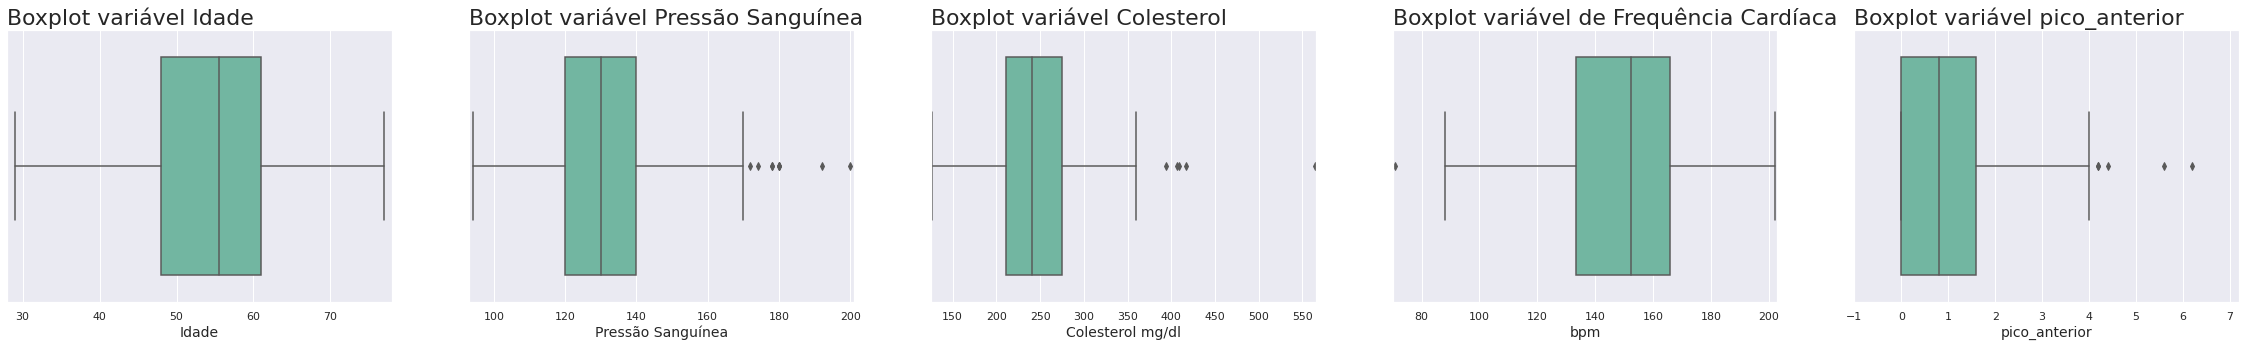

In [21]:
# plotar o boxplot das features
plt.figure(figsize=(40,5))
ax = plt.subplot(1,5,1)

ax1 = box_plot(df,'idade','Boxplot variável Idade',"Idade")

plt.subplot(1,5,2)
ax2 = box_plot(df,'pressa_sanguinea','Boxplot variável Pressão Sanguínea',"Pressão Sanguínea")


plt.subplot(1,5,3)
ax3 = box_plot(df,'colesterol_mg_dl','Boxplot variável Colesterol',"Colesterol mg/dl")


plt.subplot(1,5,4)
ax4 = box_plot(df,'freq_cardi_max','Boxplot variável de Frequência Cardíaca',"bpm")


plt.subplot(1,5,5)
ax5 = box_plot(df,'pico_anterior','Boxplot variável pico_anterior',"pico_anterior")

O gráfico do tipo Boxplot é interessante pois ele nos disponibiliza diversas informações: mediana , 1º quartial , 3º quartial e outliers , veja a seguinte imagem para poder entendê-lo:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc9%2FElements_of_a_boxplot_pt.svg%2F1280px-Elements_of_a_boxplot_pt.svg.png&f=1&nofb=1">

Tudo que fica antes do 1º quartil representa 25% do total dos dados e assim sucessivamente para cada um dos 3 quartis.

Note que podemos ter dados discrepantes , ou seja , dados fora da curva ou fora do padrão que vamos analisar posteriormente.

Na variável idade podemos notar que não há nada fora do comum , mas em todas as outra variáveis vemos dados discrepantes. Isso também pode nos representar um problema, para isso **vamos separar eles do nosso conjunto de dados principal e fazer uma análises separadas** para saber o que podemos fazer

### Tratando Outliers

Como na variável idade não temos dados *outliers* (discrepantes) , vamos retirá-la da nossa lista das variáveis numéricas a serem analisadas.

In [22]:
variaveis.remove("idade")

Os outliers são sempre presentes em bases da dados , construídos a partir de cálculos matemáticos , são muitas vezes usados para retirar "sujeiras" de dados , mas será mesmo que eles se comportam assim? vamos começar vendo os outliers para cada uma das variáveis que selecionamos:

In [23]:
for i in variaveis:
  print(i)
  out = retorna_outliers(df , i)
  print("outlier inferior: {} | outlier superior :{}".format(out[0] , out[1]))
  print("-------------------------------------------------------------")

pressa_sanguinea
outlier inferior: 90.0 | outlier superior :170.0
-------------------------------------------------------------
colesterol_mg_dl
outlier inferior: 115.38 | outlier superior :370.38
-------------------------------------------------------------
freq_cardi_max
outlier inferior: 84.12 | outlier superior :215.12
-------------------------------------------------------------
pico_anterior
outlier inferior: -2.4 | outlier superior :4.0
-------------------------------------------------------------


**Mas como se comportam outliers**? Vamos a um exemplo gráfico:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdata-fun.com%2Fwp-content%2Fuploads%2F2019%2F10%2Fexamples-of-different-outliers-2-chi%25E1%25BB%2581u-1024x365.png&f=1&nofb=1" width=800>

note que qualquer um dos pontos de cor rosa são outliers , pois estão muito fora de qualquer padrão.

Para o exemplo do nosso *dataset* , temos que qualquer valor de frequência cardiáca máxima superior a 215.12 e inferior a 84.12 são outliers, **isso porque é muito improvável que algum indivíduos tenhas essas características**.

Tendo isso em mente , vou seperar os outliers em um *dataset* específico para eles:

In [24]:
dfs = []
for var in variaveis:
  out = retorna_outliers(df,var)
  dfs.append(df.query('{} < {} or {} > {}'.format(var , out[0] , var ,out[1])))

Agora que temos um dataset para cata variável que tem outliers , vamos unir todos

In [25]:
df_outliers = pd.concat([dfs[0] , dfs[1], dfs[2] , dfs[3]] , axis=0)

Entretanto , ainda temos um problema, **podemos ter dois indivíduos que tenham 2 outliers diferentes** acarretanto em um indivíduo aparecendo duas vezes , a fim de evitar esse problema vamos eliminar o valores que estão duplicados em nosso *dataset*

In [26]:
df_outliers.drop_duplicates(inplace=True)

Vamos visualizar agora como está nosso conjunto de dados

In [27]:
df_outliers.style.background_gradient(cmap=paleta_sequencial , subset=variaveis).set_precision(2)

,idade,sexo,tipo_dor_no_peito,pressa_sanguinea,colesterol_mg_dl,acucar_no_sangue,results_eletrocard,freq_cardi_max,exercicio,pico_anterior,inclinacao,vazos_principais,taxa_thall,alvo,sexo_str
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1,Masculino
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1,Masculino
110,64,0,0,180,325,0,1,154,1,0.00,2,0,2,1,Feminino
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0,Masculino
223,56,0,0,200,288,1,0,133,1,4.00,0,2,3,0,Feminino
241,59,0,0,174,249,0,1,143,1,0.00,1,0,2,0,Feminino
248,54,1,1,192,283,0,0,195,0,0.00,2,1,3,0,Masculino
260,66,0,0,178,228,1,1,165,1,1.00,1,2,3,0,Feminino
266,55,0,0,180,327,0,2,117,1,3.40,1,0,2,0,Feminino
28,65,0,2,140,417,1,0,157,0,0.80,2,1,2,1,Feminino


Note que eu defini uma paleta de cores de forma a idetificar estes outliers diretamento no *dataset*

Podemos percebr alguns valores que apesar de serem absurdos , para um expectador externo parecem lógicos. Observe o indivíduo de número **85** , ele tem um colesterol altíssimo , altos btimentos cardíacos , não faz exercícios físicos e apresenta uma alta chance de desenvolver doenças cardíacas.

Vou me limitar a anlisar algumas variáveis mas não irei eliminar ester dados do conjunto geral , isso por que **haveria a necessidade da análise de algum especialista da área que possa afirmar com clareza e certeza se de fato há algo de errado**.

#### Pequenas Análises

Vamos começar analisando a variável de colesterol e ver como ela se comporta com alguns gráficos:

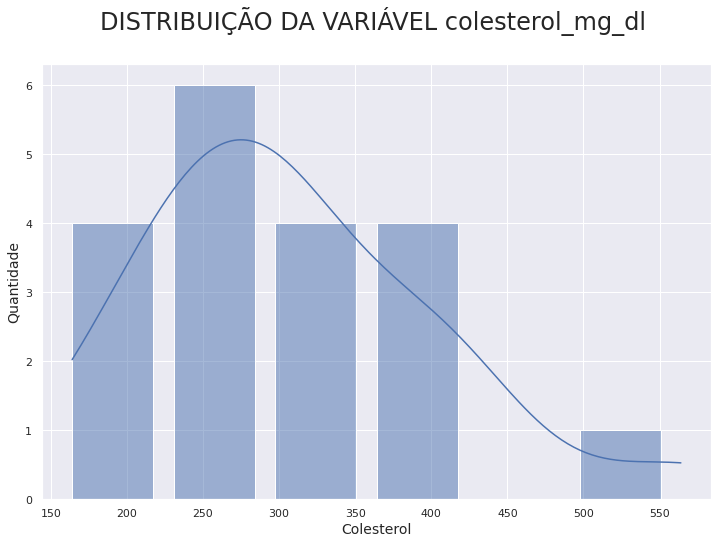

In [28]:
ax = hist_plot(df_outliers,6,"colesterol_mg_dl","DISTRIBUIÇÃO DA VARIÁVEL colesterol_mg_dl","Colesterol")
ax=ax

Ao que tudo indica , temos uma variável que se comporta como uma normal na sua distribuição , mas vamos tirar a prova disso com o *Skewness* , nele temos um valor onde se o:
*   Valor entre **-1 e +1** : distribuição **simétrica**.
*   Valor **maior que 1** : distribuição **assimétrica positiva**.
*   Valor **maior que -1** : distribuição **assimétrica negativa**.

A biblioteca do Pandas nos disponibiliza uma função que retorna justamente este coeficiente

In [29]:
v = df_outliers.colesterol_mg_dl.skew()

In [30]:
print("Para a variável colesterol_mg_dl:")
coef_person(v)

Para a variável colesterol_mg_dl:
0.9949705419468492
Distribuição Simétrica ou Relativamente simétrica


Assim como já havíamos constatado visualmente , temos ums distribuição simétrica (ou algo próximo a isso) para a variável colesterol_mg_dl

Vamos ver também se a frequência cardíaca máxima também se comporta assim:

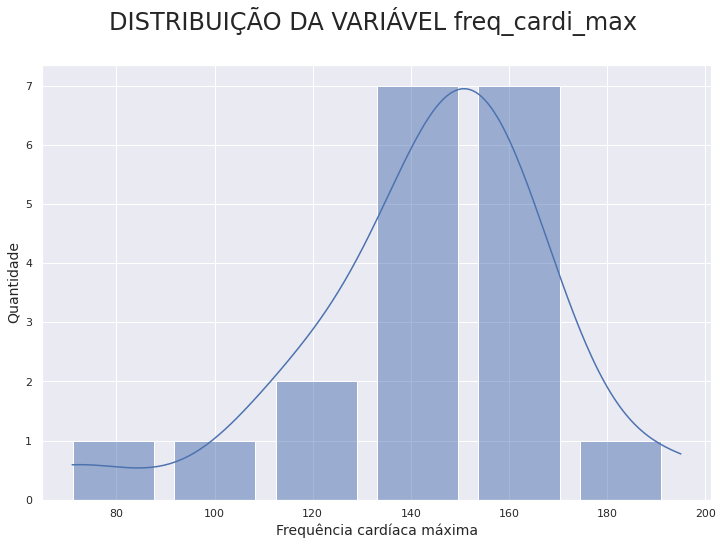

In [31]:
ax = hist_plot(df_outliers,6,"freq_cardi_max","DISTRIBUIÇÃO DA VARIÁVEL freq_cardi_max","Frequência cardíaca máxima")
ax=ax

Ao que parece ele pende um pouco para a direita , mas vamos tirar a prova

In [32]:
v = df.freq_cardi_max.skew()

In [33]:
print("Para a variável freq_cardi_max:")
coef_person(v)

Para a variável freq_cardi_max:
-0.5326712468229611
Distribuição Simétrica ou Relativamente simétrica


Apesar de visualmente parecer outra coisa , a estatística nos prova que a distribuição beira algo levemente simétrico

Por fim , vamos analisar como se distribuem as pessoas que tem e não tem doença no coração entre esses *outliers* , será que eles tendem a ter mais chance de terem doenças cardiovaculares?

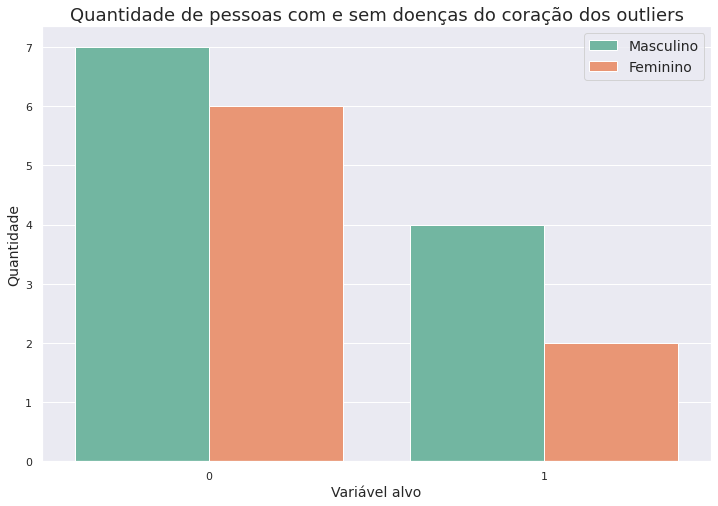

In [34]:
ax = count_plot_hue(df_outliers , "alvo","sexo","Variável alvo","Quantidade de pessoas com e sem doenças do coração dos outliers" , ["Masculino","Feminino"])

No geral , poderíamos dizer que outliers tendem a serem menos propensos a essas doenças , entretanto , temos uma quantidade de dados limitada e no geral , não sabemos o comportamento dos nossos dados como um todo.

### Correlação:

**Será que nossos dados se relacionam? O quanto eles se relacionam? Qual a conexão entre nossas variáveis?** perguntas comuns mas que serão respondidas agora.

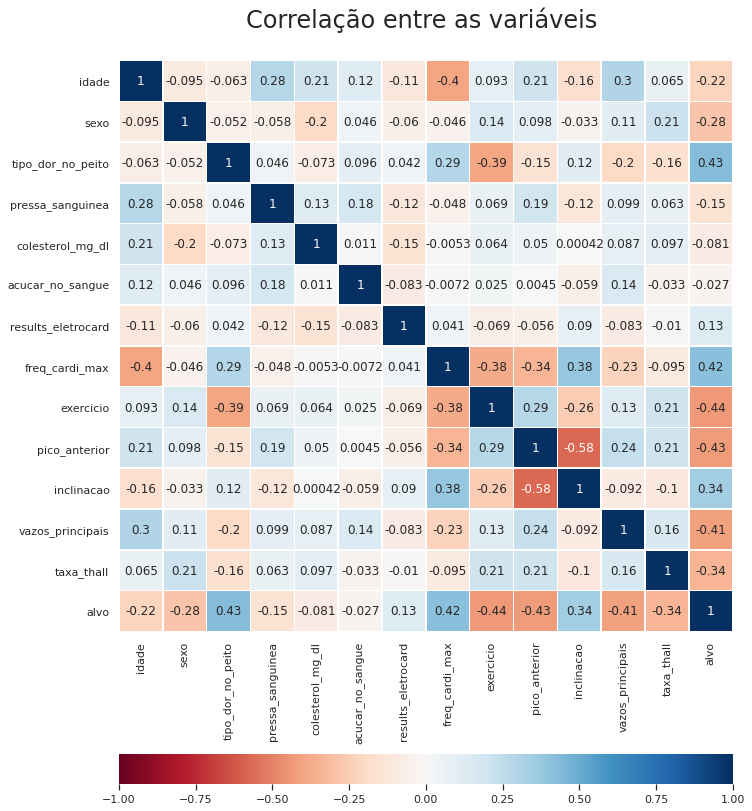

In [35]:
plt.figure(figsize=(11,15))

ax = sns.heatmap(df.corr() , cbar_kws={"orientation": "horizontal"} , annot=True , 
                 cmap=paleta_divergente , vmin=-1.0 , vmax=1.0 , linewidths=.5)
ax.set_title("Correlação entre as variáveis \n" , fontsize=24)
ax=ax

Com o gráfico de calor podemos perceber a relação entre as variáveis numéricas , onde **quanto mais próximo ao azul mais há uma correlação possitiva e quanto mais próximo ao vermelho uma correlação negativa** . Observe que temos um resultado em forma de número também.

Podemos perceber que , em geral , quanto menor a idade menor a chance de ser alvo de alguma doença , ou mesmo que quanto menos exercícios feitos maiores as chances.

### Proporção dos dados:

Deixando um pouco de lado as variáveis numéricas , vamos analisar um pouco mais a fundo agora as variáveis mais categóricas. Para isso vamos saber qual a quantidade de dados que temos para elas: 

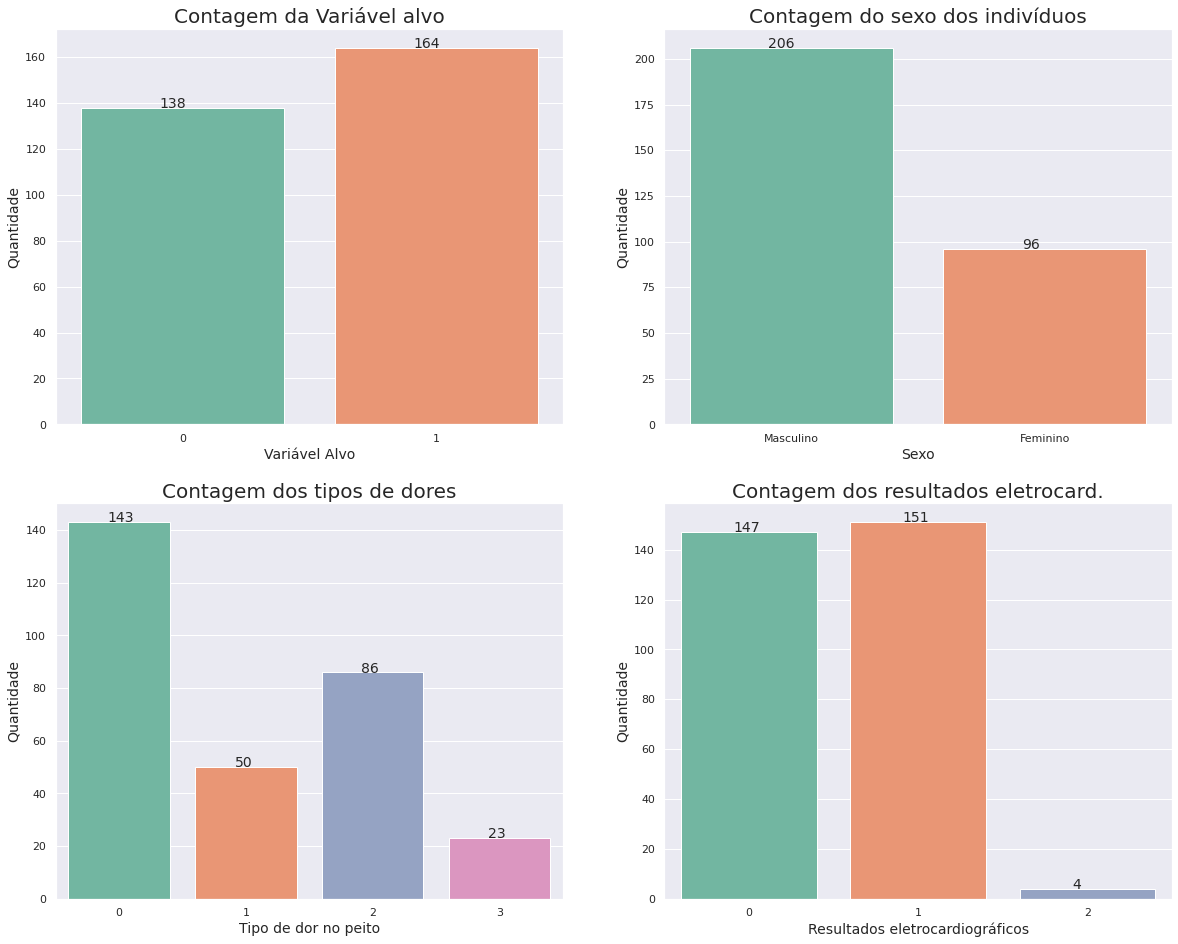

In [36]:
plt.figure(figsize=(20,16))
ax = plt.subplot(2,2,1)

ax1 = count_plot(df , 'alvo' , "Variável Alvo", "Contagem da Variável alvo")

plt.subplot(2,2,2)
ax2 = count_plot(df , 'sexo_str' , 'Sexo' , "Contagem do sexo dos indivíduos")


plt.subplot(2,2,3)
ax3 = count_plot(df , 'tipo_dor_no_peito',"Tipo de dor no peito" , "Contagem dos tipos de dores")


plt.subplot(2,2,4)
ax4 = count_plot(df , 'results_eletrocard' , "Resultados eletrocardiográficos" , "Contagem dos resultados eletrocard.")

Vamos por partes.

Já podemos perceber que temos mais indivíduos que tem mais chances de terem doenças no coração , mas a diferença entre eles e os que não tem são poucas

Em nosso conjunto de dados temos mais indivíduos do sexo Masculino do que do sexo Feminino

Podemos notar que as dores no peito do tipo 1 (dor normal) e tipo 2 (sem dor) são predomiinantes

Temos mais resultados eletrocardiográficos do tipo 0 e 1 , aqueles do tipo 2 são ínfimos

**Posteriomente vamos nos aprofundar em alguns desses casos para sabermos alguma relação entre eles**


### Histograma do Sexo dos indivíduos

Sabemos que temos mais indivíduos do sexo Masculino , mas será que as proporção das idades entre eles e aqueles do sexo Feminino são iguais?

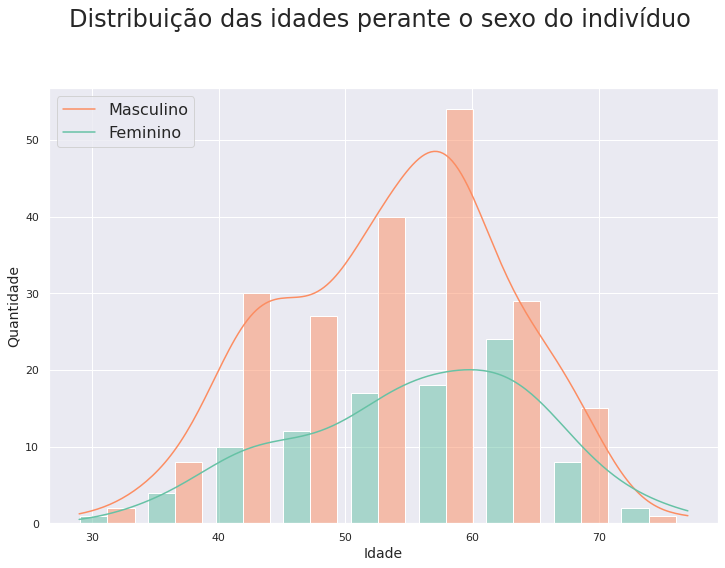

In [37]:
ax = hist_plot(df,9,"idade","Distribuição das idades perante o sexo do indivíduo \n","Idade",hue="sexo",legends=["Masculino","Feminino"])

Podemos notar que as proporções das idade são bem próximas , a única coisa que podemos destacar é que aqueles que tem idade levemente superiores aos 40 anso são maioria em indivíduos do sexo masculino:

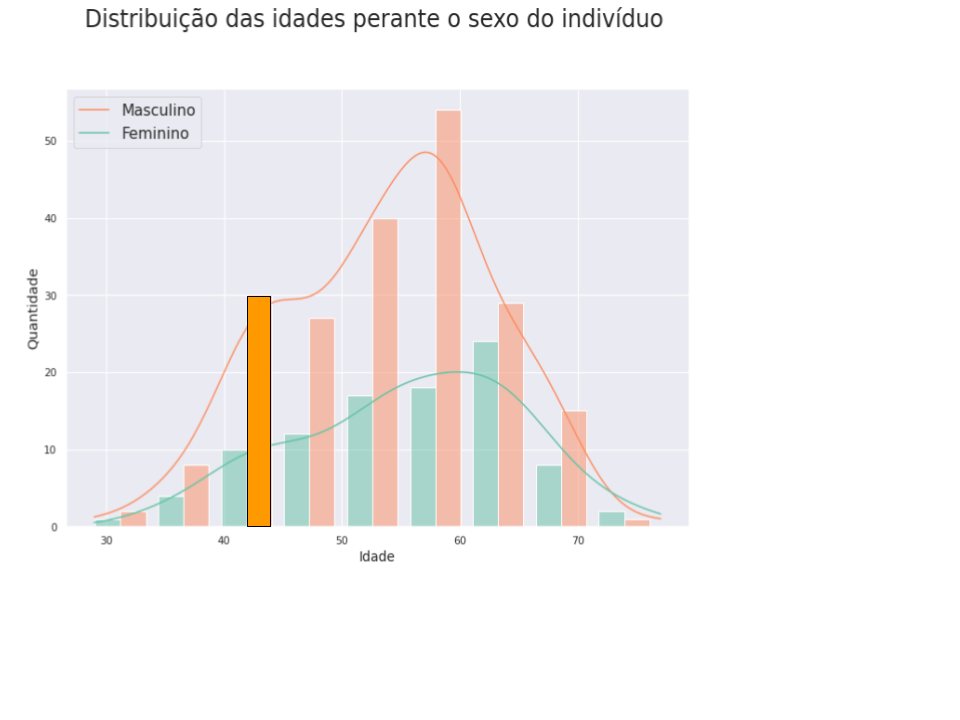

### **Mas afinal, quem tem mais chance de ter doenças do coração? Pessoas do sexo Feminino ou Masculino?**

Vamos ver um gráfico que pode nos ajudar nesse questionamento:

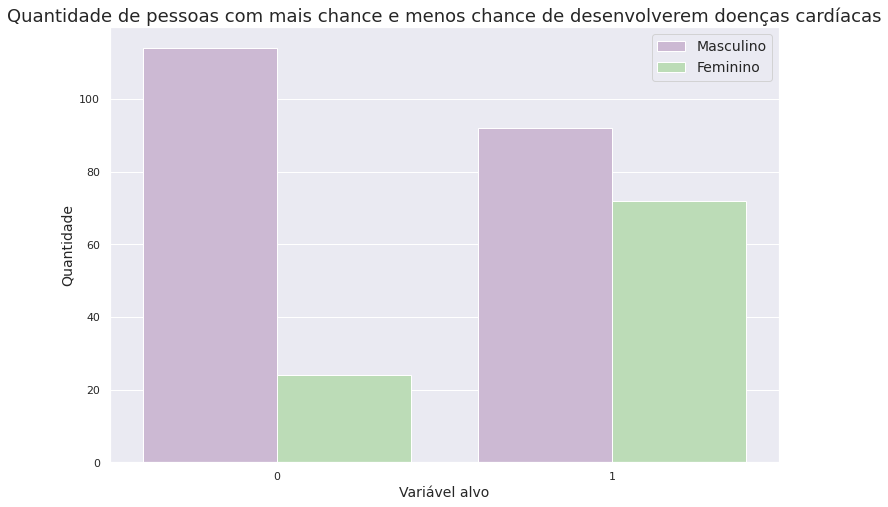

In [38]:
ax = count_plot_hue(df , "alvo","sexo_str","Variável alvo","Quantidade de pessoas com mais chance e menos chance de desenvolverem doenças cardíacas" , ["Masculino","Feminino"] , paleta = "PRGn")

Podemos perceber que apesar dos indivíduos do sexo feminino serem minoritários no *dataset* , eles tendem a ter mais doenças do coração , os do sexo Masculino aparentam tem menos chance , mas por uma diferença pequena.

**Isso quer dizer que mulheres tem mais chance de desenvolverem doenças no coração?** NÃO! não podemos estabelecer essa relação por dois fatores: Primeiro, não somos médicos ou especialistas na área e Segundo, o conjunto de dados pode simplesmente ter , por acaso do destino , selecionado mais indivíduos do sexo feminino que tenham doenças , afinal , o dataset possui somente 302 entradas.

Apesar disso , vamo analisar de maneira mais profunda estes dados

Calculando a proporção de indivíduos , pelo sexo , em nosso datset , vamos visualizar quanta diferença temos de fato em nosso conjunto de dados, para isso vou criar um novo dataset:

In [39]:
# quantidade de Masculino comparado ao total:

## Numero de indivíduos Masculino
qtd_individuos_M = df.query("sexo_str == 'Masculino'").shape[0]

## Numero de indivíduos totais
qtd_individuos_totais = df.shape[0]

## Proporção de indivíduos Masculino no dataset:
prop_M = round((qtd_individuos_M / qtd_individuos_totais)*100 , 2)

In [40]:
# quantidade de Feminino comparado ao total:

## Numero de indivíduos Feminino
qtd_individuos_F = df.query("sexo_str == 'Feminino'").shape[0]

## Proporção de indivíduos Feminino no dataset:
prop_F = round((qtd_individuos_F / qtd_individuos_totais)*100 , 2)

In [41]:
# criando um dicionário com a proporção:
dict = {
    'sexo' : ["Masculino","Feminino"],
    'prop' : [prop_M,prop_F],
}

In [42]:
df_prop = pd.DataFrame(dict)

In [43]:
df_prop

,sexo,prop
0,Masculino,68.21
1,Feminino,31.79


Podemos ver que os indivíduos do sexo Masculino são quase **70%** de todos os nossos dados:

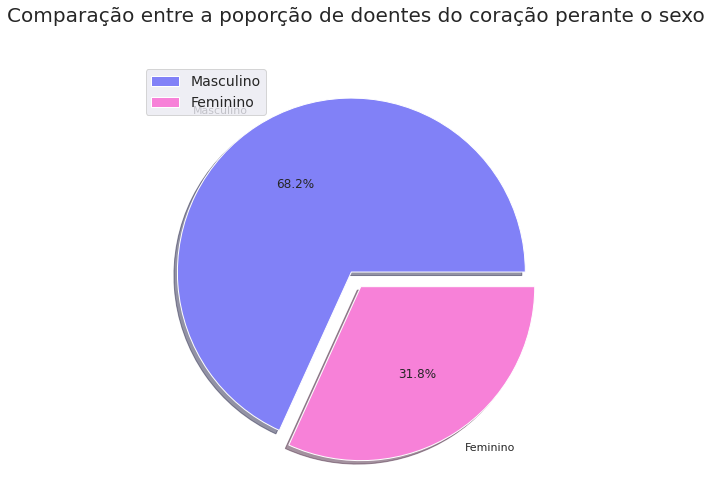

In [44]:
plt.figure(figsize=(16,8))
explode = (0.05,0.05)
ax = plt.pie(df_prop.prop , labels = df_prop.sexo , autopct='%1.1f%%' , 
             shadow=True , explode=explode , colors = ["#8181F7","#F781D8"])
plt.legend(df_prop.sexo, loc=2 , fontsize=14)
plt.title('Comparação entre a poporção de doentes do coração perante o sexo',fontsize=20 , pad=40.0)
ax=ax

Visualizando de outra forma , podemos ver o quão discrepante nossos dados são. Mas , essa diferença/discrepância também se repete para aqueles que tem doenças cardíacas?

In [45]:
# Quantidades de indivíduos Masculinos doentes mediante ao total de Masculino:

## calculando a quantidade de indivíduos masculino e com chances de desenvolverem doenças cardíacas :
qtd_individuos_M_doentes = df.query("sexo_str == 'Masculino' and alvo == 1").shape[0]

## calculando TODOS os indivíduos que tem doenças do coração
qtd_individuos_totais_doentes = df.query("alvo == 1").shape[0]

## Calculando a proporção de indivíduos do sexo Masculino doentes mediante todos aqueles que tem doenças do coração:
prop_M_doentes = round((qtd_individuos_M_doentes/qtd_individuos_totais_doentes) * 100 , 2)

In [46]:
# Quantidades de indivíduos Femininos doentes mediante ao total de Masculino:

## calculando a quantidade de indivíduos feminino e com chances de desenvolverem doenças cardíacas :
qtd_individuos_F_doentes = df.query("sexo_str == 'Feminino' and alvo == 1").shape[0]

## Calculando a proporção de indivíduos do sexo Feminino doentes mediante todos aqueles que tem doenças do coração:
prop_F_doentes = round((qtd_individuos_F_doentes/qtd_individuos_totais_doentes) * 100 , 2)

In [47]:
lista = [prop_M_doentes , prop_F_doentes]

In [48]:
df_prop["prop_doentes"] = lista

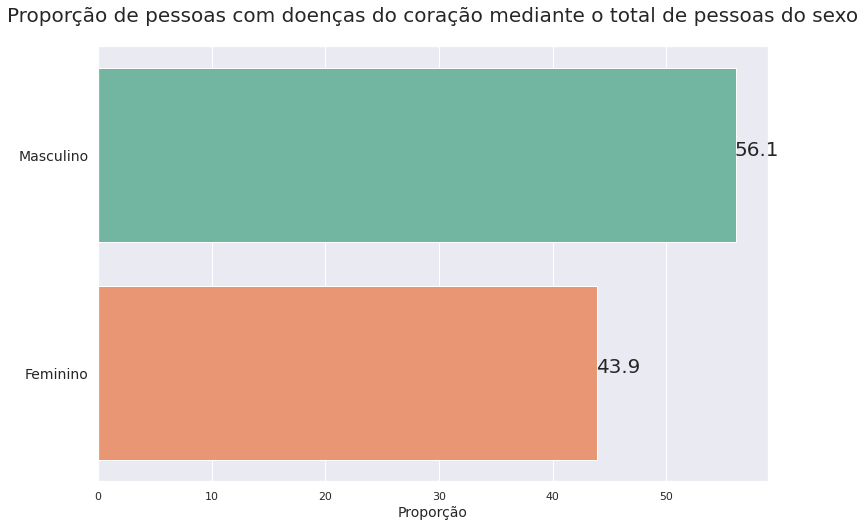

In [49]:
plt.figure(figsize=(12,8))
# plot do gráfico
ax = sns.barplot(data = df_prop , x="prop_doentes",y="sexo",orient="h" , palette=paleta_qualitativa)

# definindo as labels e o título
ax.set_title("Proporção de pessoas com doenças do coração mediante o total de pessoas do sexo" , fontsize=20 , pad=25.0)
ax.set_xlabel("Proporção" , fontsize=14)
ax.set_ylabel("")

# tamanho dos ticks dos labels:
ax.set_yticklabels(df_prop['sexo'] , fontsize=14)

# adicionando texto ao gráfico para cada item do dataframe:
for i,n in zip(df_prop['prop_doentes'].round(2) , [0,1]):
  ax.text(i-0.1 , n , i , fontsize=20)
  

ax=ax

Note que neste gráfico estamos comparado apenas a proporção de doentes de cada sexo com a quantidade total de indivíduos doentes , ou seja , peguei a quantidade de indivíduos do sexo masculino que são doentes cardíacos e dividi pela quantidade total de indivíduos doentes.

O que podemos perceber é que diferentemente do gráfico anterior onde a quantidade de indivíduos do sexo masculino era 2 vezes maior que aqueles do sexo feminino , neste a diferença de proporção já não é tão grande ,  menos de 10 pontos de diferença.

O que estamos dizendo é que 56% dos indivíduos masculinos em nosso *dataset* são doentes cardíacos e 43,9% daqueles do sexo feminino são doentes também. Apesar de ainda serem em quantidades menores , dada a quantidade de indivíduos femino , temos uma proporção relativamente alta

In [50]:
print("A quantidade de indivíduos do sexo Masculino infectados é de : {}".format(qtd_individuos_M_doentes))

print("A quantidade de indivíduos do sexo Feminino infectados é de : {}".format(qtd_individuos_F_doentes))

A quantidade de indivíduos do sexo Masculino infectados é de : 92
A quantidade de indivíduos do sexo Feminino infectados é de : 72


Note que a quantidade de indivíduos doentes do sexo Feminino e Masculino são bem próximas

### Mas e os Batimentos Cardíacos?

Em nosso conjunto de dados temos uma varável chamada ```freq_cardi_max``` a qual nos informa a **frequência cardíaca máxima** (também chamado de **BPM**) do indivíduo. Mas será que ela pode nos dizer algo sobre os indivíduos que tendem a ter doenças cardíacas?



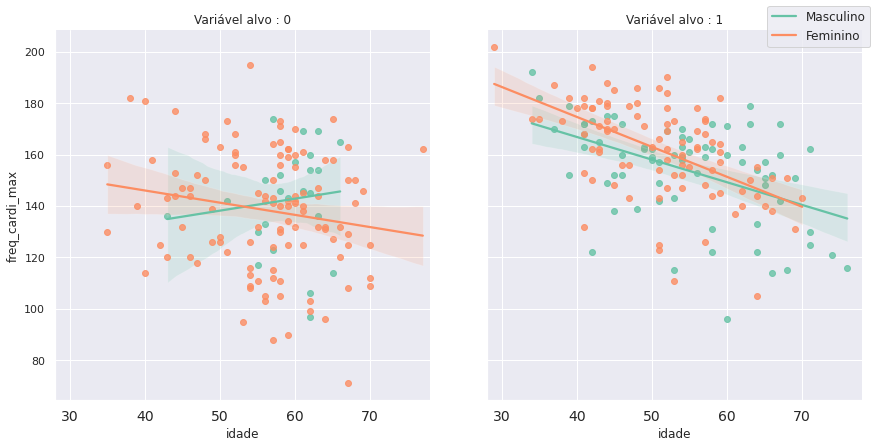

In [51]:
ax = sns.lmplot(data=df, x="idade",y="freq_cardi_max" , col="alvo", 
                palette = paleta_qualitativa , height=6 , hue="sexo" , legend=False)
ax.fig.legend(['Masculino','Feminino'] , fontsize=12)


ax.set_xticklabels(fontsize=14)
ax.fig.subplots_adjust(wspace=.15)
ax.set(xlim=(df.idade.min()-1, df.idade.max()+1))
ax.set_titles(col_template="Variável alvo : {col_name}")

ax=ax

Algo que já podemos notar é que aqueles que tem doenças cardíacas tem geralmente maiores frequências cardíacas , mas que ao longo dos anos tendem a ter diminuições mais acentuadas das frequências , como mostram as linhas de regressão.

Outro fato interessante é que os indivíduos do sexo Masculino que não tendem a ter doenças cardíacas **aparentam** ter um aumento de frequência cardíaca com o passar da idade , isso é algo que pode ser estudado e analisado.

*Uma conclusão que podemos chegar é que normalmente indivíduos que tendem a ter doenças do coração , também tendem a ter uma frequência cardíaca média maior*.

**Isso não é uma relação direta , ou seja , não podemos afirmar que uma ocasiona a outra , mas ambas andam juntas .**

### Dores no peito
#### Dores torácica tem alguma relação com doenças cardíacas?

Existem diversas forma de identificar alguma doença . A mais comum sem dúvida são as dores. Algo comum do corpo mano é reagir a qualquer problema por meio de neurotransmissores que informam o corpo que algo está errado a partir de dores, mas será que isso acontece com doenças cardíacas?

<Figure size 1440x2160 with 0 Axes>

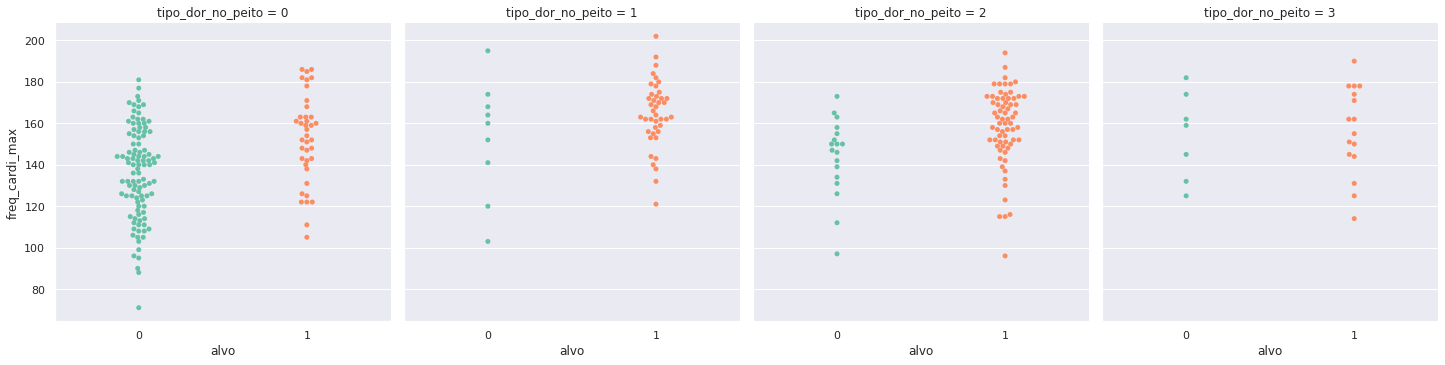

In [52]:
plt.figure(figsize=(20,30))
ax = sns.catplot(data=df,x="alvo",y="freq_cardi_max",kind="swarm",col="tipo_dor_no_peito" , palette=paleta_qualitativa)

Antes de começar-mos vou retornar ao nosso dicionário e auxiliar na legendas dos tipos de dores no peito. Temos que:

- **Valor 0**: Típica
- **Valor 1**: Atípica
- **Valor 2**: Sem dor
- **Valor 3**: Assintomático

O que podemos notar é que dores no peito do tipo **0 , 1 e 2** são as mais comuns para indivíduos que tem tendências a ter doenças cardíacas. Ao consultarr nosso dicionário de dados , podemos perceber que dores típicas , atípicas e a ausência de dor são os resultados comuns, **logo , não há como estabelecer uma relçao direta entre o tipo de dor no peito e a presença de dores cardíacas**.
<br> <br>

Veja também que no eixo Y do gráfico temos a frequência cardíaca máxima, e como já contatado acima , aparentemente indivíduos que tem menores frequências cardíacas também tem menos chances de desenvolverem doenças cardíacas. novamente , não é necessariamente uma relação de causalidade.
<br> <br>

Outra coisa interessante a ser constatada é que indivíduos que sentem dor no peito do tipo 2 (sem dor) , irônicamente , parecem ter mais tendência a serem cardíacos.

**Após nossas análises gráficos vamos colocar a mão na massa e começar a desenvolver um modelo de Machine Learning que possa nos dizer se um indivíduo qualquer tem ou não tem chance de desenvolver doenças cardíacas.** 

## Machine Learning

Antes de iniciar qualquer análise , **você sabe o que é Machine Learning?** Em muitos momentos citei esse termo , mas afinal , o que é Machine Learning?

Como o próprio nome já sugere, *Machine Learning* (ou **Aprendizado de Máquinas** em Português) é um ramo da I.A (Integência Artificial) para análise de dados que trata da noção de que máquina podem aprender determinada tarefa a partir de dados existêntes , buscando padrões , visando a automação de tarefas e da tomada de decisão , tornando a intervençã humana quase mínima.

Tudo isso é feito por meio de algorítmos , que buscam padrões nos dados. Tais algorítmos são feitos a partir de cálculos estatísticos e modelos matemáticos que vão criando "regras" e a partir disso buscam resultados.

O *Machine Learning* se divide em 2 ramos principais: **Apendizado Supervisionado** e **Aprendizado não Supervisionado**. entretanto existem outros

1) **Aprendizado Supervisionado**:
<p>
  Como o próprio nome sugere, neste há necessidade de supervisão dos dados a fim de "ensinar" algo a máquina . Aqui damos um conjunto de dados à máquina e ela aprende a categorizar o que temos lá , sendo que já demos também a resposta a ele.


> "[aprendizado supervisionado destina-se a encontrar padrões em dados que possam ser aplicados em um processo analítico](https://www.ibm.com/br-pt/analytics/machine-learning)" 


</p>
<br>

2) Aprendizado não Supervisionado:
<p>
  O Aprendizado não Supervisionado ocorre quando temos dados não rotulados/classificados . O mais comum deste aprendizado é a clusternização , nele "criamos" categorias para dados parecidos e os agrupamos. Um exemplo podem ser sistemas de recomendação , que unem filmes ou produtos que tendem a ser parecido ou comprados juntos , ou mesmo que sejam complementares uns aos outros.
</p>

Agora que já sabemos o que é Machine Learning vamos colocar a mão na massa , mas antes vou importar o pacotes necessários para isso.

In [53]:
# divisão de dados
from sklearn.model_selection import train_test_split

# resumo / report do modelo
from sklearn.metrics import classification_report

# metricas
from sklearn.metrics import accuracy_score

Ao iniciar com Machine Learning devemos ter em mente algumas etapas , toda criação de Modelo , e quando digo "Modelo" quero dizer **criar um objeto em programação capaz de classificar nossos dados** , tem de passar pelas seguintes etapas:

1.   Criar a base do Modelo ;
2.   Treinar o modelo com uma determinada quantidade de dados ;
3.   Fazer predições com outra determinada quantidade de dados ;
4.   Medir o quão bom é o nosso modelo ;



Existem diversos algorítmos para a criação de um Modelo de *Machine Learning* , cada qual com suas peculiaridades e funções , além de fórmulas e métodos específicos usados neles.

Em nosso caso usarei 4 e a partir deles irei selecionar o que melhor se adequa as nossas necessidades , eles são: **Random Forest Classifier** , **Linear SVC** , **Logistic Regression** e **KNeighbors Classifier** . No momento da criação do modelo irei explicar a funcionalidade de cada um.

Antes de tudo temos de fazer as divisões dos nossos dados. **O que estamos buscando e o que temos para fazer essa busca ?** . Estes são o que chamamos de varíaveis explicativas e variável alvo respectivamente (ou também chamam de variáveis X e variável Y) . Vamos dividir nossos dados pensando nisso. 

**O que estamos buscando?** Queremos saber a classificação da variável `alvo` , a variável que nos diz se um indivíduo tem ou não tem a chance de desenvolver doenças cardíacas , portanto , ela será a nossa variável alvo: 

In [54]:
y = df["alvo"]

**O que temos para fazer essa busca?** Basicamente tudo , com excessão da variável alvo e uma variável repetida nos dados (se lembra que no começo repeti a variável sexo , mas com o valor em forma de texto ? não usaremos ela) é o que temos para tentar explicar ou justificar se esperamos que um indivíduos tem mais ou menos chance de desenvolver doenças cardíacas.

In [55]:
X = df.drop(['alvo','sexo_str'],axis=1)

Tendo dividido nossos dados vamos para outra divisão.

Se lembra que no passo a passo acima para criar um objeto capaz de fazer classificações temos que também separar uma parte dos dados para "treinar" nosso modelo e outra para "testar" , isso é , uma parte será usada para adequar nosso modelo e a outra para saber se essa adequação foi boa o suficiente. chamamaos isso de divisão teste treino ou em inglês **train teste split** . Existe uma maneira de fazer isso automaticamente:

In [56]:
X_treino , X_teste , y_treino , y_teste = train_test_split(X , y , shuffle=True , stratify = y , random_state=28 , test_size=0.3)

O importante que devemos ressaltar nessa divisão é que usaremos 30% dos nossos dados para fazer testes e que fizemos que em ambos os conjuntos de dados (teste e treino) tenhamos valores proporcionais para a variável alvo , isso previne um enviesamento do modelo e seus resultados , evidentemente que se o modelo tiver mais dados classificados como 1 , ele ficará melhor para classificar valores 1

**obs: Muitos dos algorítmos são complexos ou muito difíceis de se entender , tentarem trazer uma breve explicação sobre eles , mas a função deste artigo não é falar sobre algorítmos.** 

### Random Forest Classifier

Assim como o nome , o Random Forest Classifier faz classificações com floresta aleatórias , isto é , para cada árvore de uma floresta , temos uma quantidade N de possibilidades de resultado.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

A intância (*instance*) na imagem são nossos dados , Para cada Árvore (*tree*) , temos galhos simbolizados por pontos azuis os qual são critérios ("condições") que no fim geral um resultado de predição.

Além de um algorítmo simples , ele também é flexivel e normalmente nos retorna bons resultados.

caso queira entender mais , deixo aqui um [artigo de referência](https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleatória-3545f6babdf8#:~:text=Conclusão-,Como%20Funciona,com%20o%20método%20de%20bagging.)

O primeiro passo é fazer o import deste algorítmo:

In [57]:
from sklearn.ensemble import RandomForestClassifier 

Instanciando o modelo:

In [58]:
modelo = RandomForestClassifier(random_state=28)

Treinando o modelo com nossos dados de treino:

In [59]:
modelo.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=28, verbose=0,
                       warm_start=False)

fazendo previsões com nossos dados de teste:

In [60]:
previsoes = modelo.predict(X_teste)

Agora que temos nosso modelo treinado e feito as previsões , chegou a hora mais importante , ver como ele se saiu. A métrica mais usada é a acurácia: Basicamente a taxa de acerto do modelo:

In [61]:
acuracia = accuracy_score(y_teste,previsoes)
print("acurácia de:",acuracia)

acurácia de: 0.7692307692307693


**Com isso podemos ver que tivemos uma acrácia de 0.769 , ou seja , nosso modelo acertou 76,9% dos nossos dados.**

Entretanto há ainda uma forma mais completa de visualizar este resultado:

In [62]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.79      0.78      0.78        49

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



Dessa forma podemos ver a Precisão do modelo para cada classe , assim como o *recall* e o *f1-score* . Caso tenha interesse em saber mais sobre essas métrica , já escrevi um artigo completo sobre elas, você pode acessar clicando [aqui](https://luis-miguel-code.medium.com/como-lidar-com-classes-desbalanceadas-em-machine-learning-precision-recall-oversampling-e-ce21e3ccb615).

Ao meu ver , 76.9 % de taxa de acerto não parecer ser algo tão bom , mas no fim do artigo iremos debater mais sobre isso.

### LinearSVC:

O LinearSVC é basicamente  um SVM , ou seja uma "máquina de vetores de suporte" , meio difícil né? Sim! Vamos explicar de uma forma mais simples.

O que o LinearSVC faz é encontrar uma linha (uma equação) que possa separar os dados e classificar , assim como mostrado na imagem:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.saracus.com%2Fwp-content%2Fuploads%2F2019%2F05%2FLinearSVC_CondensedNearestNeighbour.png&f=1&nofb=1" width=500>

Note que existe uma reta que separa as classes , feita a partir de uma equação que a própria máquina gera e julga capaz de classificar nossos dados.

In [63]:
from sklearn.svm import LinearSVC

In [64]:
# instanciando o modelo:
modelo = LinearSVC(random_state=28 , max_iter=100000)

# treinando o modelo:
modelo.fit(X_treino,y_treino)

# Fazendo previsões com o modelo:
previsoes = modelo.predict(X_teste)

# calculando a acurácia:
acuracia = accuracy_score(y_teste,previsoes)

# Vendo os resultados
print("acurácia de:",acuracia)
print(classification_report(y_teste,previsoes))

acurácia de: 0.7472527472527473
              precision    recall  f1-score   support

           0       0.81      0.60      0.68        42
           1       0.72      0.88      0.79        49

    accuracy                           0.75        91
   macro avg       0.76      0.74      0.74        91
weighted avg       0.76      0.75      0.74        91



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Dessa vez tivemos um resultado levemente pior quando comparado ao RandomForest , de 0.74 , ou seja , nosso modelo acertou 74% dos dados , mas como indica no *Classification Report* , aparentemente nosso modelo acerta mais casos classificados como 0 (*precision*) , o que é um problema.

### Logistic Regression

O *Logistic Regression* , ou Regressão Logistica é bem próximo ao LinearSVC. Ele também tenta criar uma linha (equação) que possa predizer valores, mas ao contrário de classificar , ele cria um reta que possa predizer valores. Apesar de ser usado muito em regressões , podemos usá-lo tranquilamente para classificação:

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# instanciando o modelo:
modelo = LogisticRegression(random_state=28 , max_iter=10000)

# treinando o modelo:
modelo.fit(X_treino,y_treino)

# Fazendo previsões com o modelo:
previsoes = modelo.predict(X_teste)

# calculando a acurácia:
acuracia = accuracy_score(y_teste,previsoes)

# Vendo os resultados
print("acurácia de:",acuracia)
print(classification_report(y_teste,previsoes))

acurácia de: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.75      0.86      0.80        49

    accuracy                           0.77        91
   macro avg       0.78      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



Tivemos resultados novamente bem próximo ao Random Forest , com uma acurácia de 0.76 , mas novamente podemos notar que o modelo aparentar ter classificado melhor os valores de 0 **(Possivelmente isso se dá pelo fato de haverem mais valores classificados como 0 em nosso dataset)**.

### KNeighbors Classifier

O KNeighbors Classifier , ou classificador de K vizinhos é usado tanto para classificar quanto para regressões. Ao contrário dos outros , este não cria uma reta(equação) ou coisa do tipo , na verda ele tenta agrupar valores que ele julga serem parecidos em formatos de clusters. Este algorítmos é muito útil quando se tem mais classes e quando temos dados sobre clientes. Modelos de recomendação usam ele com base

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# instanciando o modelo:
modelo = KNeighborsClassifier()

# treinando o modelo:
modelo.fit(X_treino,y_treino)

# Fazendo previsões com o modelo:
previsoes = modelo.predict(X_teste)

# calculando a acurácia:
acuracia = accuracy_score(y_teste,previsoes)

# Vendo os resultados
print("acurácia de:",acuracia)
print(classification_report(y_teste,previsoes))

acurácia de: 0.6813186813186813
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.69      0.73      0.71        49

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91



Desta vez obtivemos uma taxa de acurácia menor , mas os valores de precision e recall parecem estar mais equilibrados que os anteriores. Com isso , temos um modelo que agrupa/classifica corretamente **68%** das vezes , o que eu julgo ser pouco.

### Qual escolher?

Nossos modelos tiveram resultados bem próximos , de fato temos uma pergunta difícil de ser respondida. A escolha de um modelo de Machine Learning deve ir além de simples resultados. Lembre-se que ao implementado devemos ter um modelo que seja leve e não tão complexo de ser entendido , facilitando assim a manutenção do código (se necessário) ou possíveis mudanças futuras que não afetem muito a performace.

Todos os modelos que usamos são algorítimos inciais , portanto , é bem provável que mesmo um cientista de dados junior já saiba um pouco sobre cada um deles.

Aquele que **provavelmente** seria escolhido seria o Random Forest Classifier , um algorítmo quase universal.

Como dito anterioemente , ele é simpels , fácil de ser usado e feito manutenção , robusto e multi-uso , tudo que precisamos para um bom modelo.

e porque eu enfatizei a palavra **Posteriomente** ? vamos debater isso logo

## Conclusões:

Em nosso dados temos relativvamente poucas entradas , como vimos antes são 302 , o que é pouco. Nesse sentido , apesar de termos menos indivíduos do sexo Feminino , vimos que eles apresentam mais chances de terem doenças cardíacas. Claramente , não podemos afirma que um seja consequência do outro , pode ser simplesmente coincidência.

Importante ressaltar também que temos *outliers* em nossos dados , mas que aparentemente não estavam errados , eram dados reais , apesar de "absurdos" .  Assim como também a falta de exercícios podem aumentar as chances de desenvolver doenças do coração

Na criação do nosso modelo obtivemos valores extramente insatisfatórios. Obviamente que 100% de acurácia seria algo impossível , mas 76% ainda é pouco , principalmente quando pensamos que **o resultado do modelo pode salvar uma vida** , cada 1% faz diferença.

**Mas o que fazer?** Bem , o ideal seria ter uma base de dados maior , para uma melhor precisão do modelo , apenas 302 dados é uma quantidade insuficiente , para este caso.

Não há como implementar um modelo de Machine Learning neste momento 

## Links

Obrigado por acessar este artigo , por favor , considere visitar meus links para redes sociais:



*   [linkTree](https://linktr.ee/iNukss)

